In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/final_yelp.csv')
df2 = pd.read_csv('../data/tidy_yelp.csv')


C:\Users\zachg\AppData\Local\Temp\ipykernel_34872\975105783.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('../data/tidy_yelp.csv')


## Cleaning our data and merging them

In [3]:
df.drop(columns=['Unnamed: 0','review_id'], inplace=True)

In [4]:
df2.drop(columns=['Unnamed: 0','review_id','review_id','dimension','confidence','classification_dict'], inplace=True)
df2.drop_duplicates(inplace=True)

In [5]:
final_df = df.merge(df2, on='review_text', how='left')

In [6]:
final_df.head()

,review_text,Food Quality,Service,Ambiance,Wait Time,Price/Value,Menu Variety,Cleanliness,business_id,user_id,business_name,review_date,business_city,attributes
0,The oysters here were amazing. The raw oysters...,0.904089,0.961304,0.734387,0.456808,0.745752,0.713770,0.309262,_ab50qdWOk0DdB6XOrBitw,f9IKEjKCNZ_l8AqA5H0Xmg,Acme Oyster House,2020-01-18,New Orleans,"{""RestaurantsTakeOut"":""True"",""Alcohol"":""'full_..."
1,Char broiled oysters are the bomb! My boyfrien...,0.633277,0.241952,0.298222,0.029431,0.022147,0.223638,0.001584,_ab50qdWOk0DdB6XOrBitw,bq7lX3c3fsFjUmVzVhgELw,Acme Oyster House,2020-01-04,New Orleans,"{""RestaurantsTakeOut"":""True"",""Alcohol"":""'full_..."
2,"The charbroiled oysters were delicious, cheese...",0.815513,0.433760,0.402189,0.029045,0.253536,0.521807,0.022661,_ab50qdWOk0DdB6XOrBitw,Id_VrcgaxwbG6t_upjGZ3Q,Acme Oyster House,2020-01-24,New Orleans,"{""RestaurantsTakeOut"":""True"",""Alcohol"":""'full_..."
3,We came a few minutes after it opened so we di...,0.919579,0.452685,0.604372,0.398239,0.939389,0.760565,0.186585,_ab50qdWOk0DdB6XOrBitw,pPr5MRSj8QiB2F2vg_QsAA,Acme Oyster House,2020-01-05,New Orleans,"{""RestaurantsTakeOut"":""True"",""Alcohol"":""'full_..."
4,Im not a fan of seafood lets just say that. Bu...,0.968794,0.987599,0.303442,0.350131,0.825735,0.650473,0.138133,_ab50qdWOk0DdB6XOrBitw,z0qnaHebiScP798mdfLNEA,Acme Oyster House,2020-01-25,New Orleans,"{""RestaurantsTakeOut"":""True"",""Alcohol"":""'full_..."


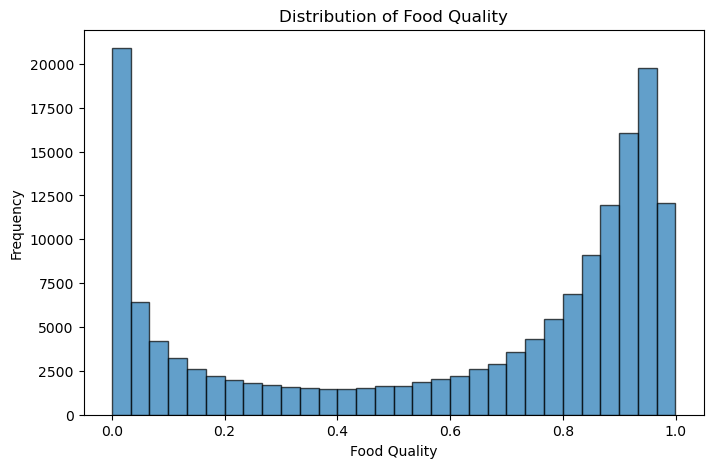

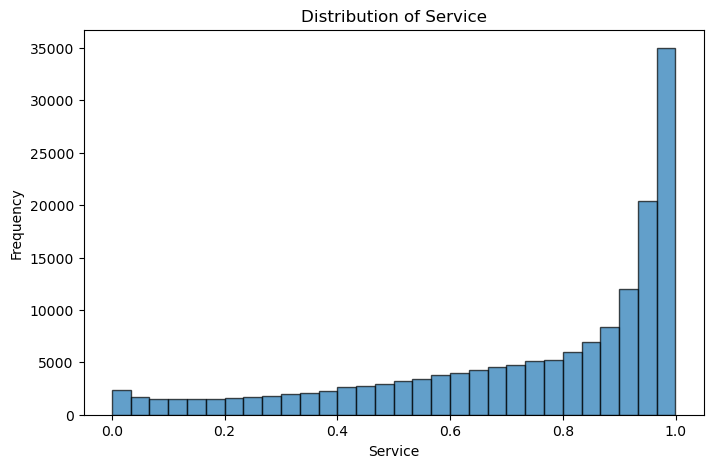

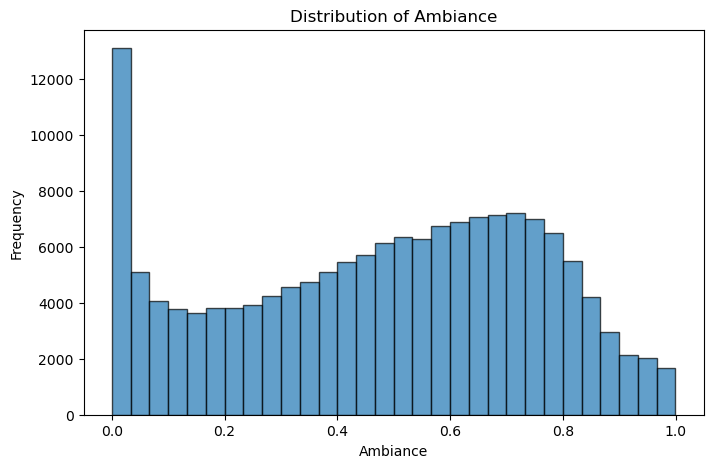

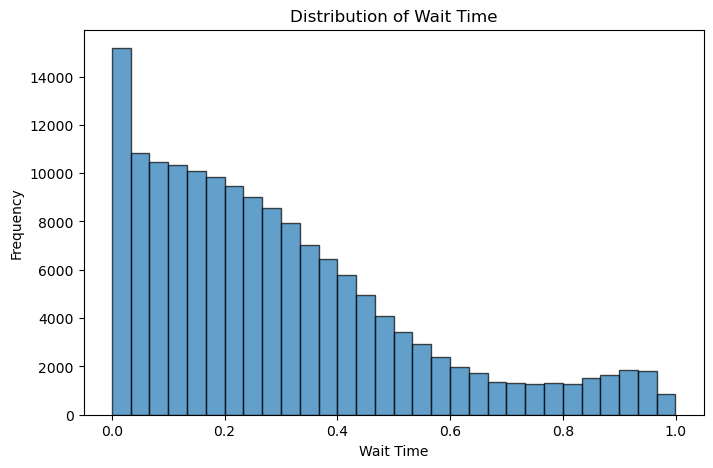

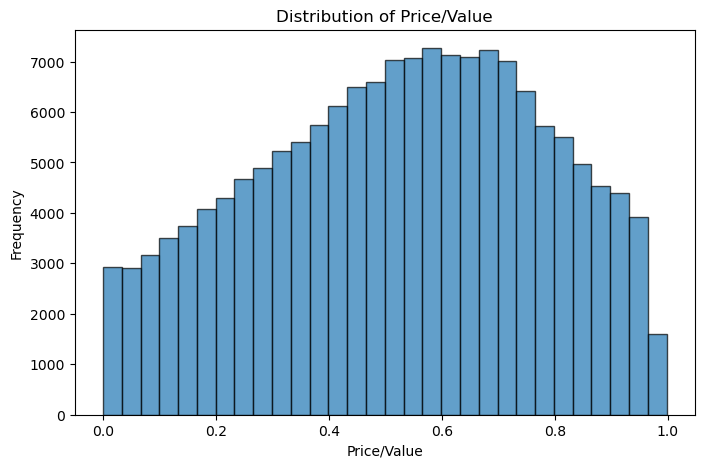

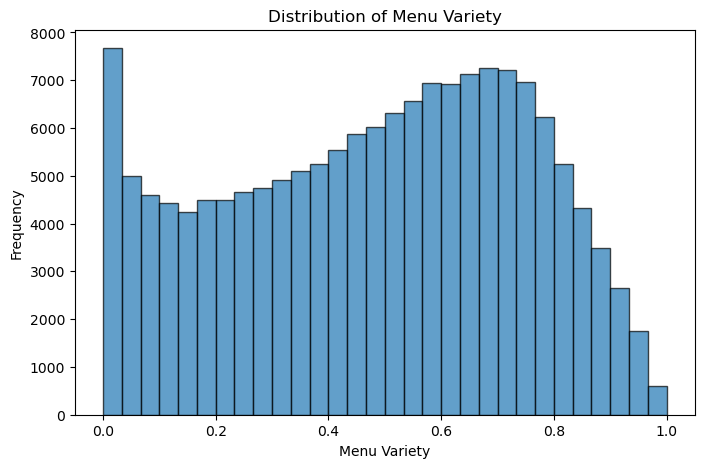

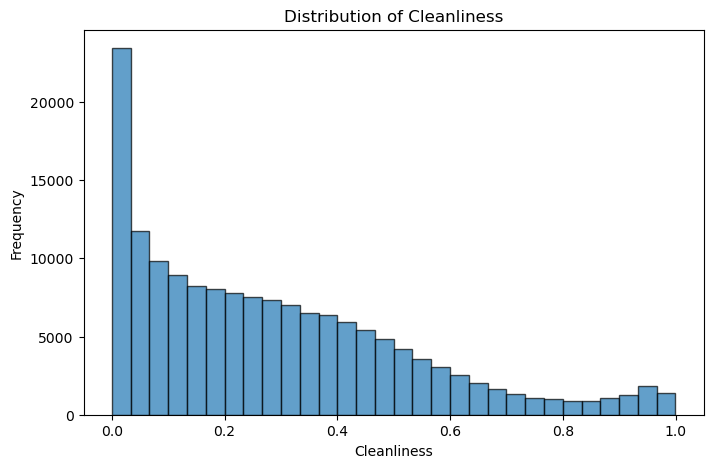

In [7]:
# Select only numeric columns
numeric_cols = final_df.select_dtypes(include=['number'])

# Plot histograms for each numeric column
for col in numeric_cols.columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()

In [8]:
final_df.to_csv('../data/usage_yelp.csv', index=False)